<a href="https://colab.research.google.com/github/Harshkotkar/Deep-Learning/blob/main/Indian_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import kagglehub
uciml_pima_indians_diabetes_database_path = kagglehub.dataset_download('uciml/pima-indians-diabetes-database')

print('Data source import complete.')


Data source import complete.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [17]:
path="/kaggle/input/pima-indians-diabetes-database/diabetes.csv"
df=pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


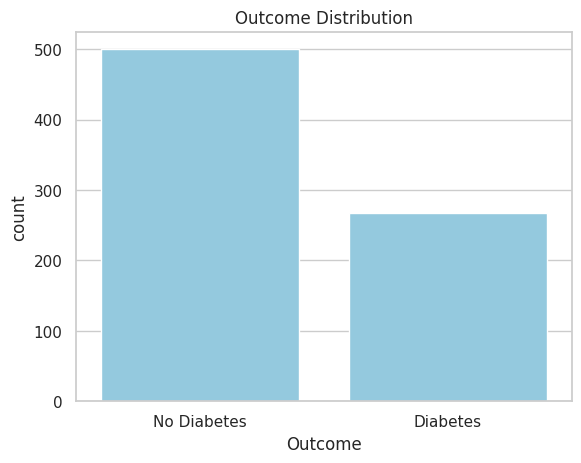

In [29]:
sns.countplot(x="Outcome",data=df,color="skyblue")
plt.title("Outcome Distribution")
plt.xticks([0,1],["No Diabetes","Diabetes"])
plt.show()

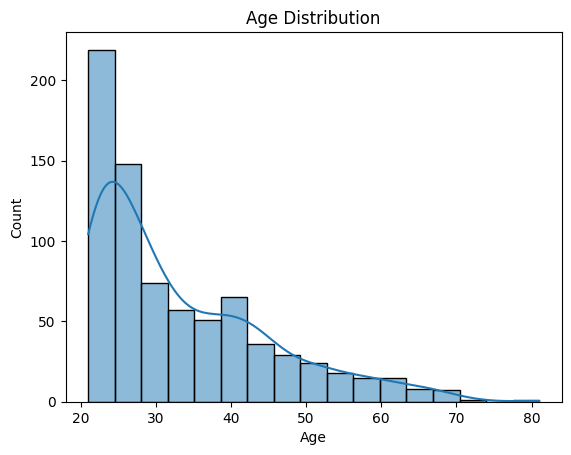

In [15]:
sns.histplot(df['Age'],kde=True)
plt.title("Age Distribution")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'yaxis'

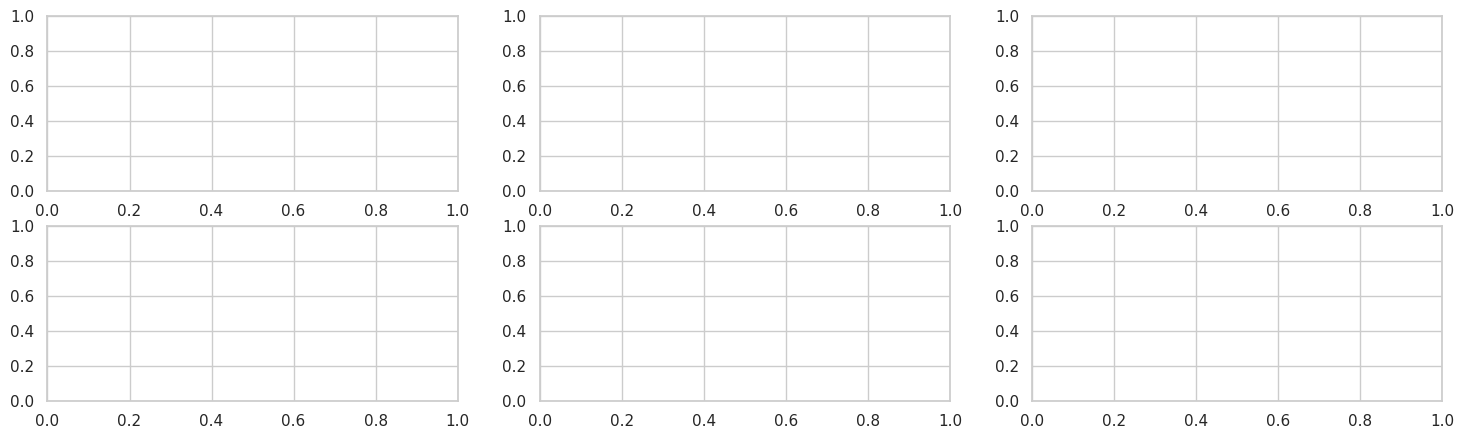

In [36]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 5))  # 1 row, 3 columns

# Plot 1: Pregnancies vs Age
sns.scatterplot(x='Age', y='Pregnancies', data=df, ax=axes[0], color='teal')
axes[0].set_title("Pregnancies vs Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Pregnancies")

# Plot 2: Insulin vs Age
sns.scatterplot(x='Age', y='Insulin', data=df, ax=axes[1], color='orange')
axes[1].set_title("Insulin vs Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Insulin")

# Plot 3: Glucose vs Age
sns.scatterplot(x='Age', y='Glucose', data=df, ax=axes[2], color='purple')
axes[2].set_title("Glucose vs Age")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Glucose")

plt.tight_layout()
plt.show()


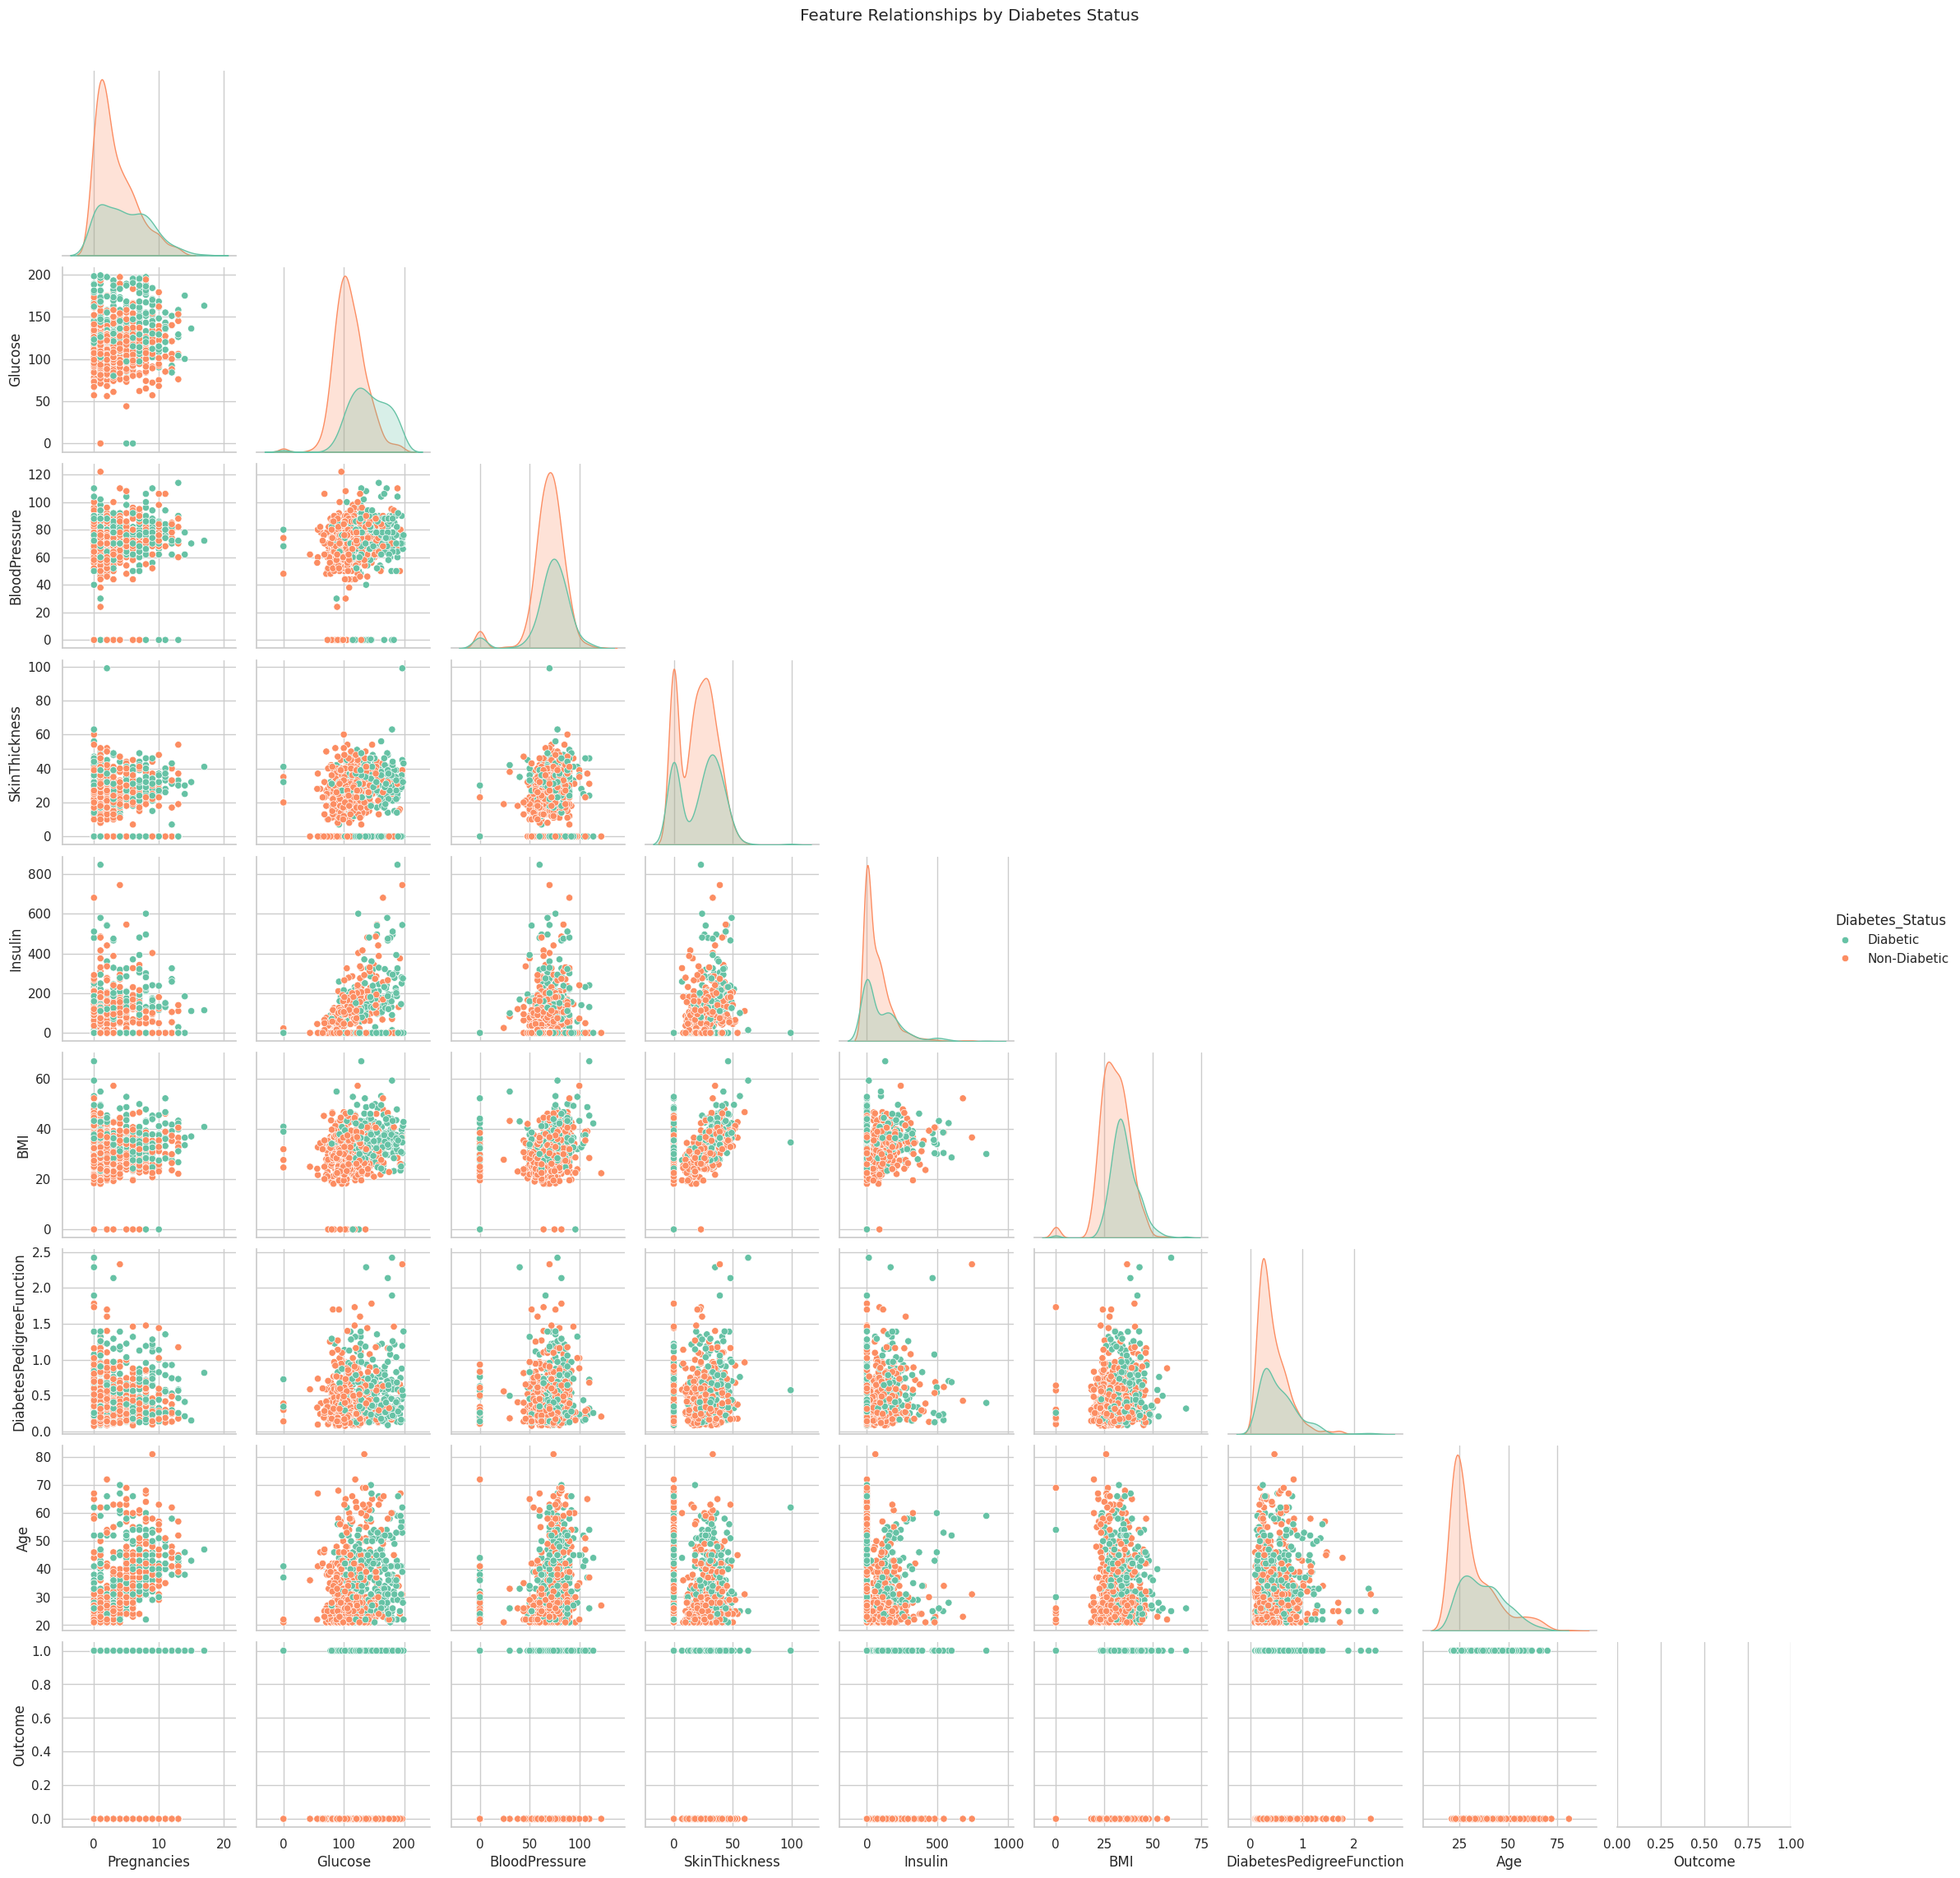

In [35]:
df["Diabetes_Status"]=df["Outcome"].map({1:"Diabetic",0:"Non-Diabetic"})

sns.pairplot(df, hue='Diabetes_Status', corner=True, palette='Set2')
plt.suptitle("Feature Relationships by Diabetes Status", y=1.02)
plt.show()
